In [1]:
# setting warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

# import modules and components
from FEXT.commons.utils.dataloader.serializer import get_images_path, DataSerializer
from FEXT.commons.utils.validation import DataValidation
from FEXT.commons.utils.preprocessing import DataSplit
from FEXT.commons.pathfinder import VAL_PATH, IMG_DATA_PATH

# Load and prepare data

In [2]:
images_paths = get_images_path(IMG_DATA_PATH, sample_size=None)
splitter = DataSplit(images_paths)     
train_data, validation_data, test_data = splitter.split_data() 

print(f'Number of train samples: {len(train_data)}')
print(f'Number of validation samples: {len(validation_data)}')
print(f'Number of test samples:  {len(test_data)}')

Number of train samples: 5663
Number of validation samples: 1618
Number of test samples:  810


# 1. Data evaluation

### 1.1 Pixel intensity 

100%|██████████| 1618/1618 [00:06<00:00, 258.50it/s]


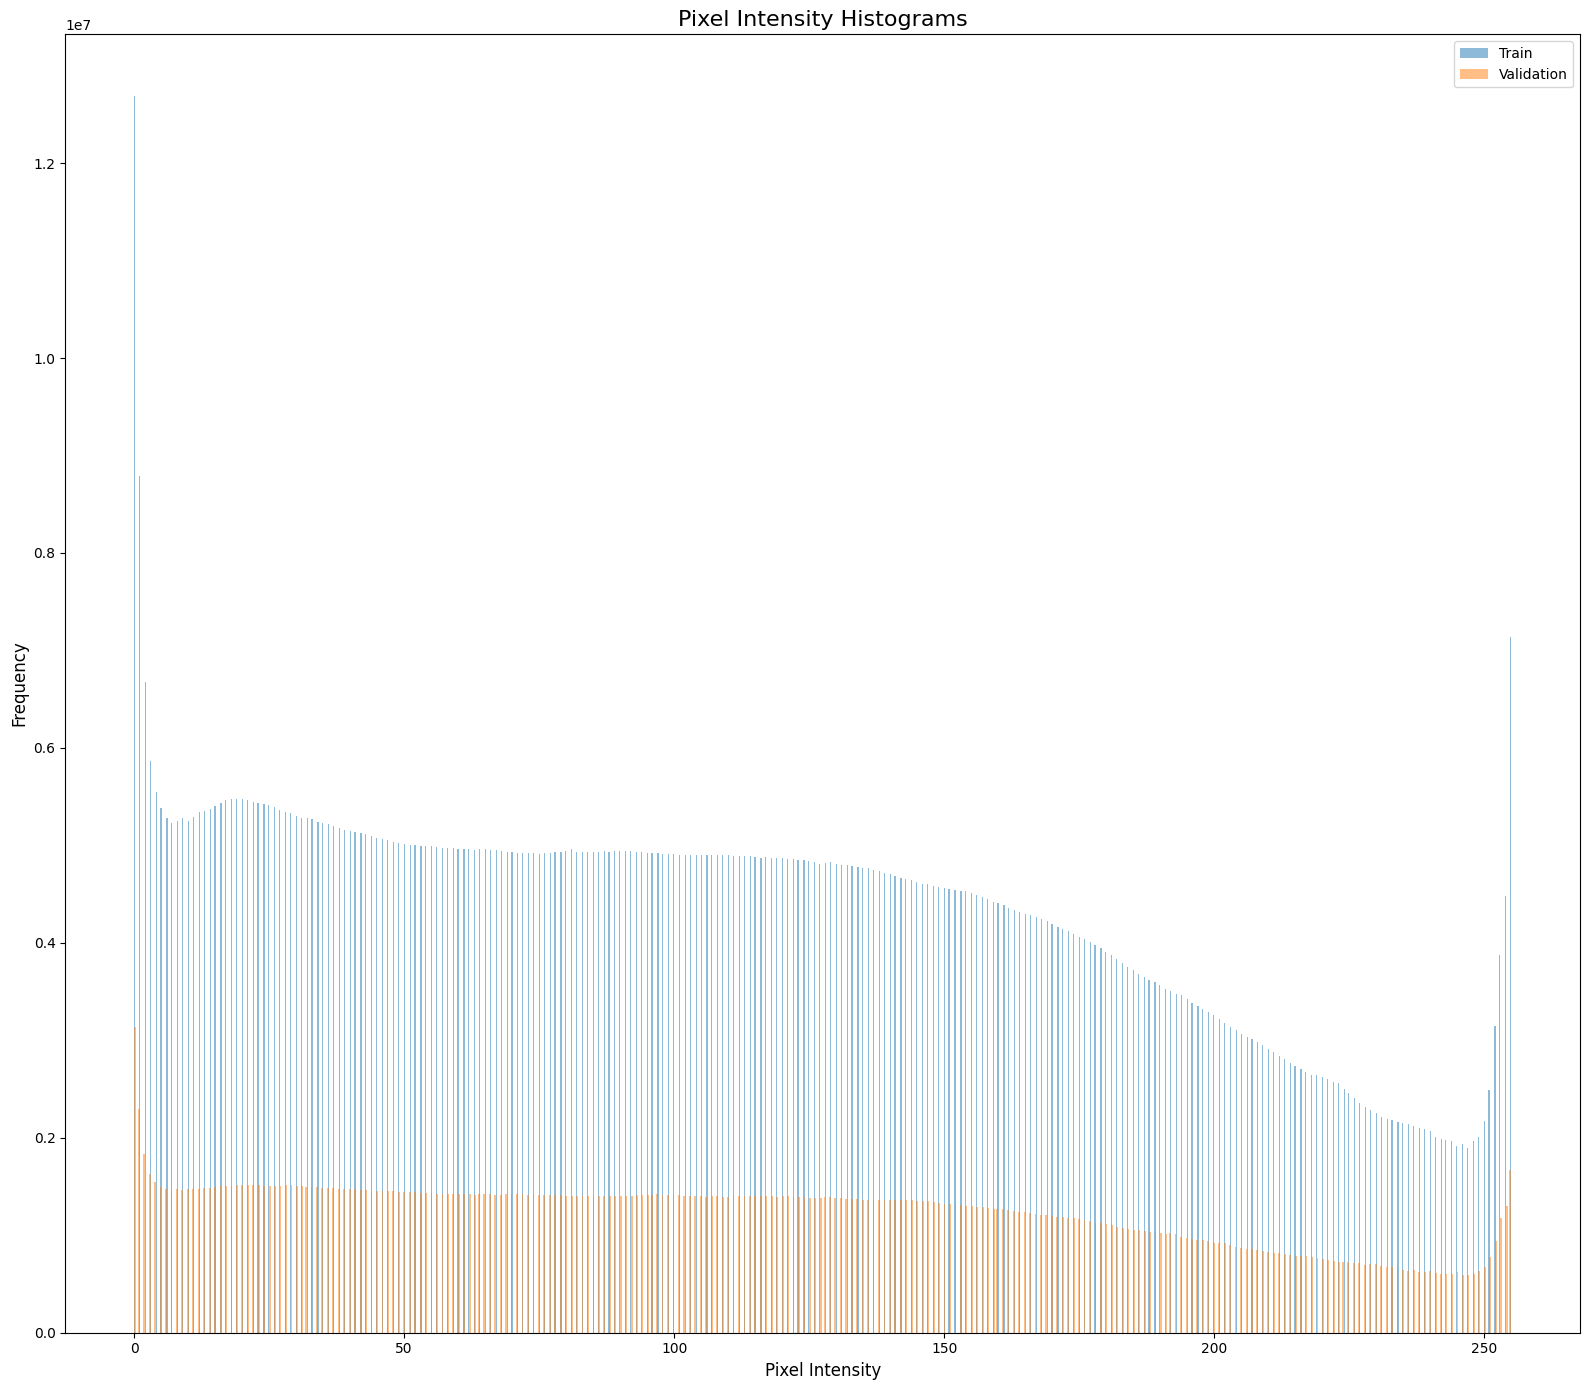

In [3]:
# load train and validation images as numpy arrays
serializer = DataSerializer()
validator = DataValidation()
train_images = serializer.load_images(train_data, as_tensor=False,  normalize=False)
validation_images = serializer.load_images(validation_data, as_tensor=False, normalize=False)

# validate pixel intensity histograms for both datasets
images_dictionary = {'Train' : train_images,
                     'Validation' : validation_images}
validator.pixel_intensity_histograms(images_dictionary, VAL_PATH)